# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [33]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(data.shape)
data.head()

(5391, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [34]:
# 결측값 확인
data.isna().values.any()

False

In [35]:
# 중복 확인
data[data[["Release_Date", "Movie_Title"]].duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [36]:
data[data.Movie_Title == "A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [37]:
data.drop_duplicates(subset=["Release_Date", "Movie_Title"], inplace=True)
data[data.Movie_Title == "A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   object
 4   USD_Worldwide_Gross    5390 non-null   object
 5   USD_Domestic_Gross     5390 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [39]:
column_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross","USD_Domestic_Gross"]
remove_sign = [",", "$"]
for col in column_to_clean:
    for sign in remove_sign:
        data[col] = data[col].str.replace(sign, "")
    data[col] = pd.to_numeric(data[col])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   int64 
 4   USD_Worldwide_Gross    5390 non-null   int64 
 5   USD_Domestic_Gross     5390 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 294.8+ KB


<ipython-input-39-040c50522351>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].str.replace(sign, "")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [40]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


In [42]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [66]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [49]:
print(f"The average production budget is ${round(data.USD_Production_Budget.mean(), 2)}")
print(f"The average worldwide gross revenue is ${round(data.USD_Worldwide_Gross.mean(), 2)}")
print(f"The minimum revenue are ${data.USD_Worldwide_Gross.min()}(world) and ${data.USD_Domestic_Gross.min()}(domestic)")

The average production budget is $31119487.81
The average worldwide gross revenue is $88871907.2
The minimum revenue are $0(world) and $0(domestic)


In [55]:
bottom_25_data = data.sort_values("USD_Worldwide_Gross", ascending=False)[-int(len(data.USD_Worldwide_Gross)*0.25):]
round(bottom_25_data.USD_Worldwide_Gross.mean() - bottom_25_data.USD_Production_Budget.mean(), 2)

-5442225.24

In [57]:
print(f"Highest production budget: ${data.USD_Production_Budget.max()}")
print(f"Highest worldwide revenue: ${data.USD_Worldwide_Gross.max()}")

Highest production budget: $425000000
Highest worldwide revenue: $2783918982


In [71]:
print(data.loc[data.USD_Production_Budget.idxmax()])
print()
data.loc[data.USD_Production_Budget.idxmin()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object



Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [64]:
zero_domestic_revenue_data = data[data.USD_Domestic_Gross == 0].sort_values("USD_Production_Budget", ascending=False)
print(zero_domestic_revenue_data.shape)
zero_domestic_revenue_data.head()

(511, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [65]:
zero_worldwide_revenue_data = data[data.USD_Worldwide_Gross == 0].sort_values("USD_Production_Budget", ascending=False)
print(zero_worldwide_revenue_data.shape)
zero_worldwide_revenue_data.head()

(356, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0


### Filtering on Multiple Conditions

In [72]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(international_releases.shape)
international_releases.head()

(155, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [74]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [77]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [81]:
data_clean = data[data.Release_Date < scrape_date]
print(data_clean.shape)
data_clean

(5383, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [85]:
money_losing = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")
len(money_losing) / len(data_clean)

0.3726546535389188

# Seaborn for Data Viz: Bubble Charts

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

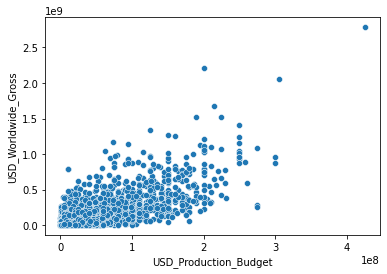

In [87]:
sns.scatterplot(data=data_clean,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross")

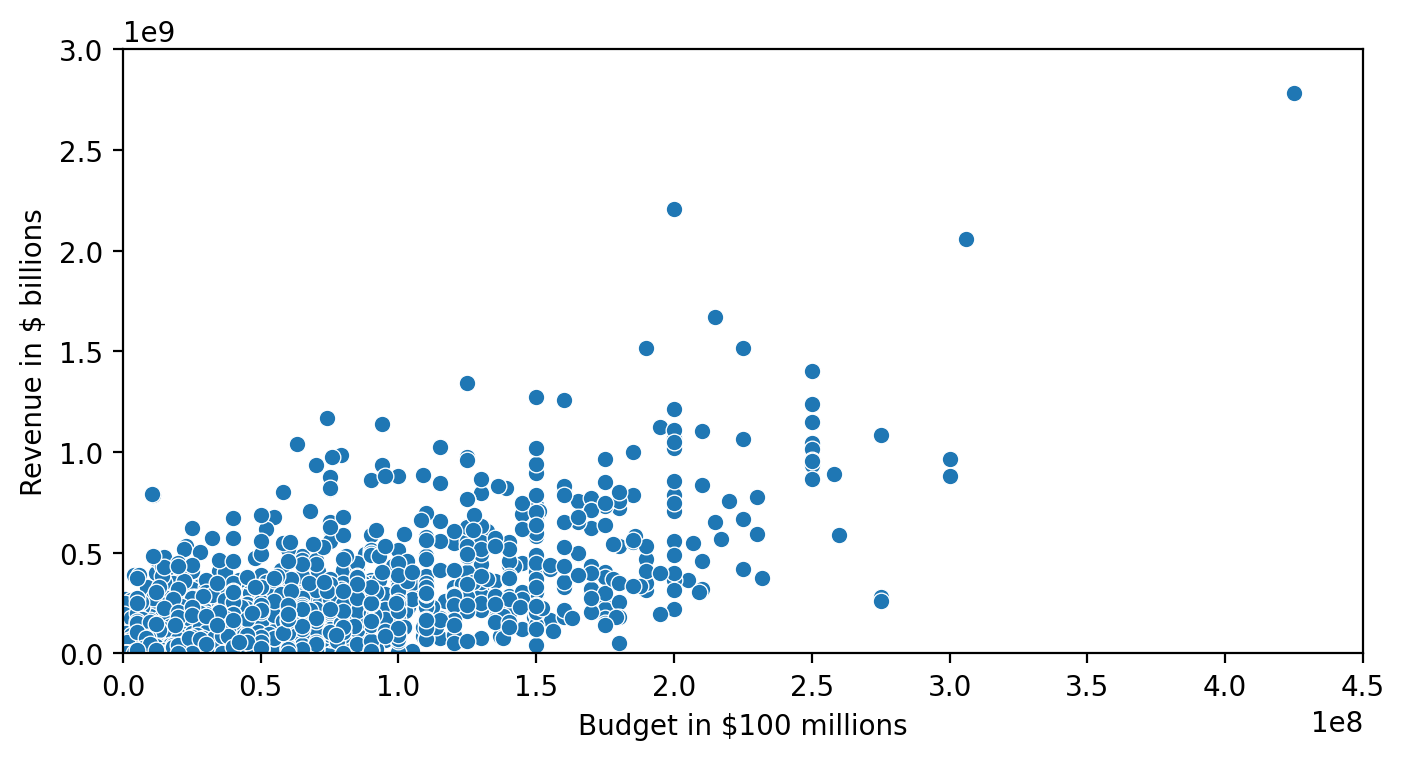

In [89]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x="USD_Production_Budget",
                     y="USD_Worldwide_Gross")

ax.set(ylim=(0,3000000000),
       xlim=(0,450000000),
       ylabel="Revenue in $ billions",
       xlabel="Budget in $100 millions")

plt.show()

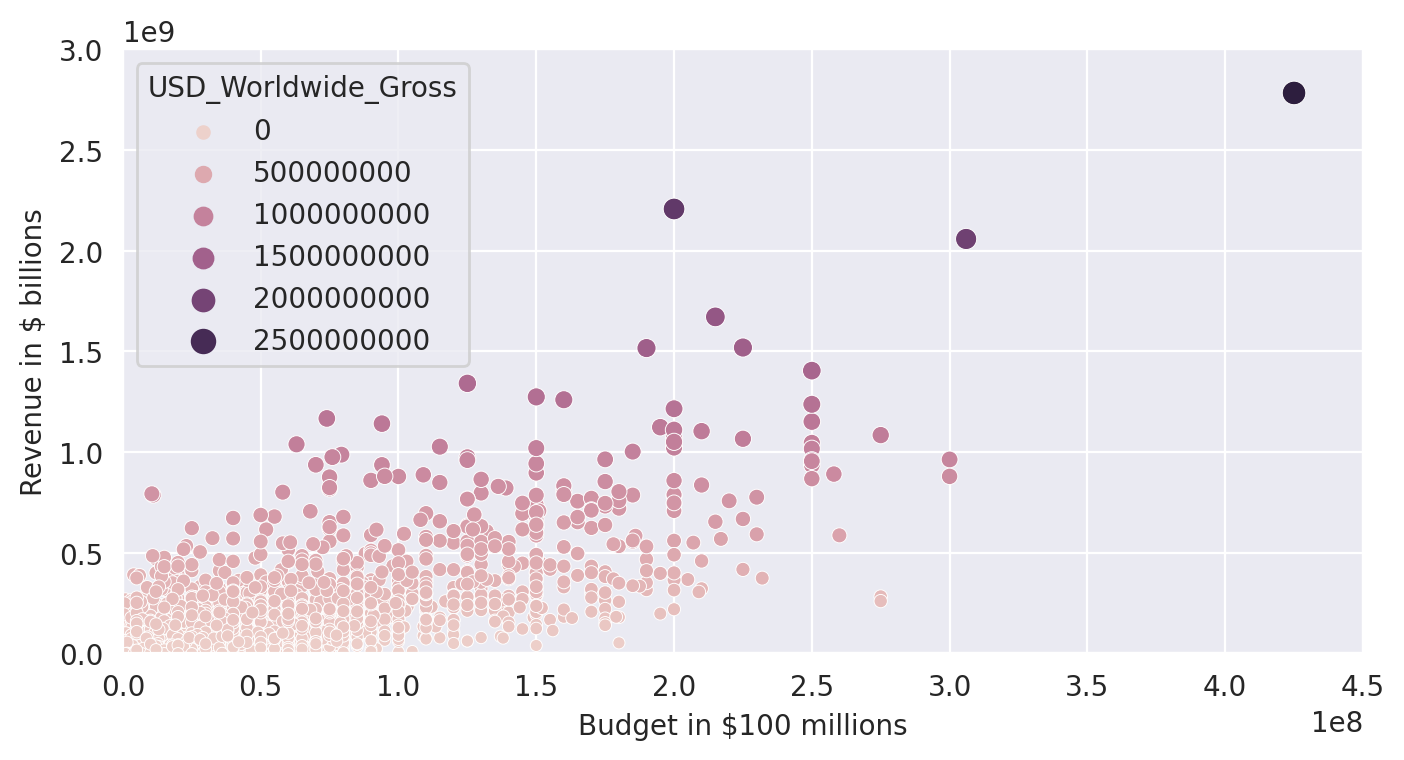

In [91]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                        x="USD_Production_Budget",
                        y="USD_Worldwide_Gross",
                        hue="USD_Worldwide_Gross",
                        size="USD_Worldwide_Gross")

    ax.set(ylim=(0,3000000000),
        xlim=(0,450000000),
        ylabel="Revenue in $ billions",
        xlabel="Budget in $100 millions")

    plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



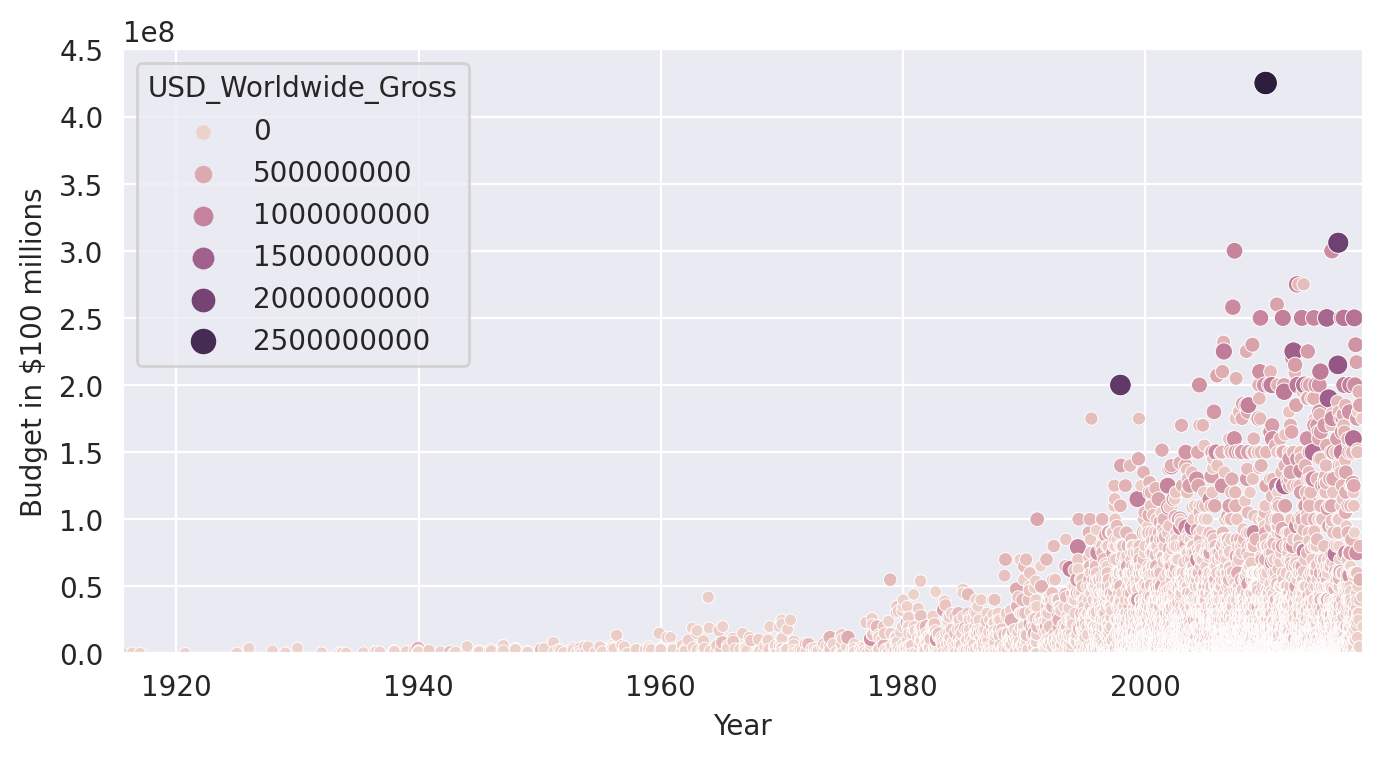

In [96]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                        x="Release_Date",
                        y="USD_Production_Budget",
                        hue="USD_Worldwide_Gross",
                        size="USD_Worldwide_Gross")
    
    ax.set(ylabel="Budget in $100 millions",
           xlabel="Year",
           ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()))

    plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [107]:
data_clean["Decade"] = (pd.DatetimeIndex(data_clean.Release_Date).year // 10)* 10
data_clean

<ipython-input-107-7d8b7bbe13f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Decade"] = (pd.DatetimeIndex(data_clean.Release_Date).year // 10)* 10


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [109]:
old_films = data_clean.query("Decade < 1970")
new_films = data_clean.query("Decade >= 1970")
print(len(old_films))
old_films.loc[old_films.USD_Production_Budget.idxmax()]

153


Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object

# Seaborn Regression Plots

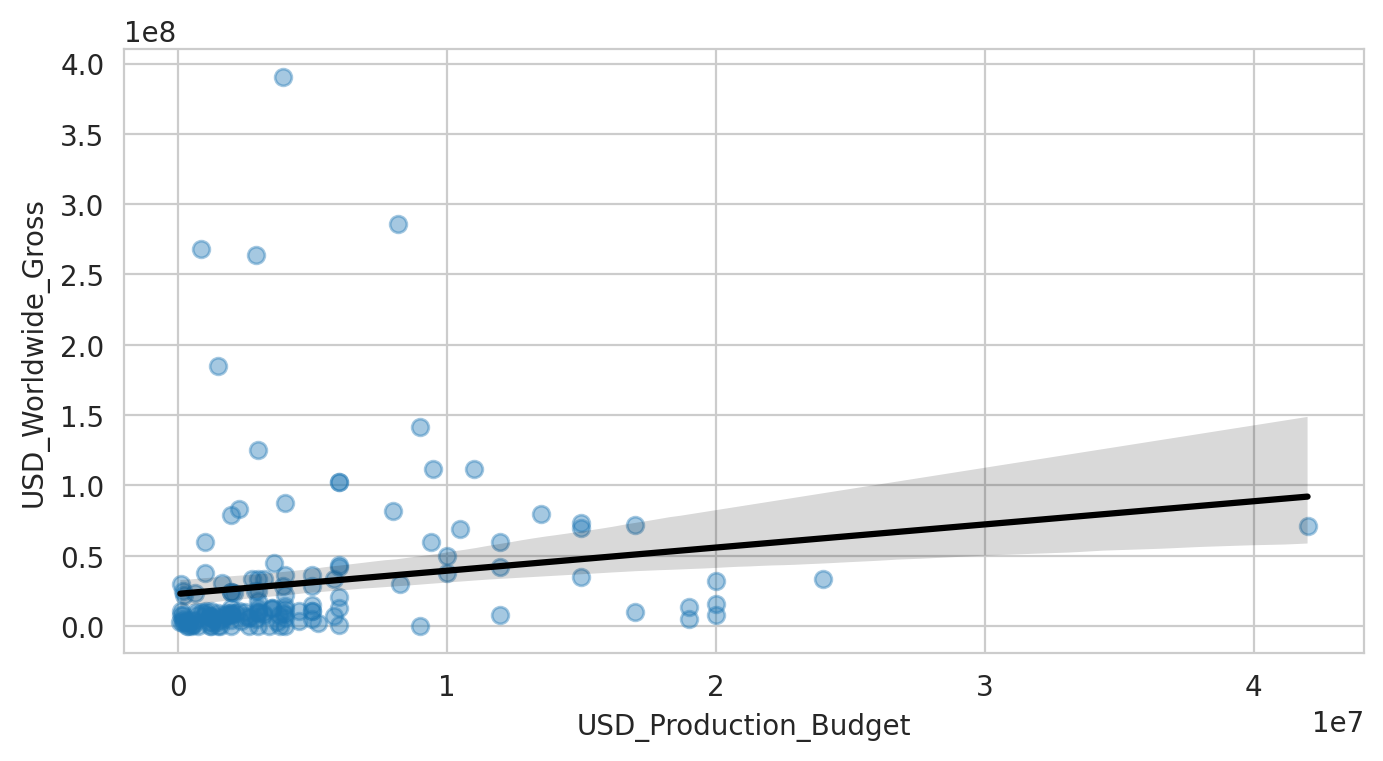

In [112]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                scatter_kws={"alpha": 0.4},
                line_kws={"color": "black"})

저 예산 영화가 수익이 더 높은 경우 가 많이 보임. 예산과 수익간의 관계를 알기 어려움.

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

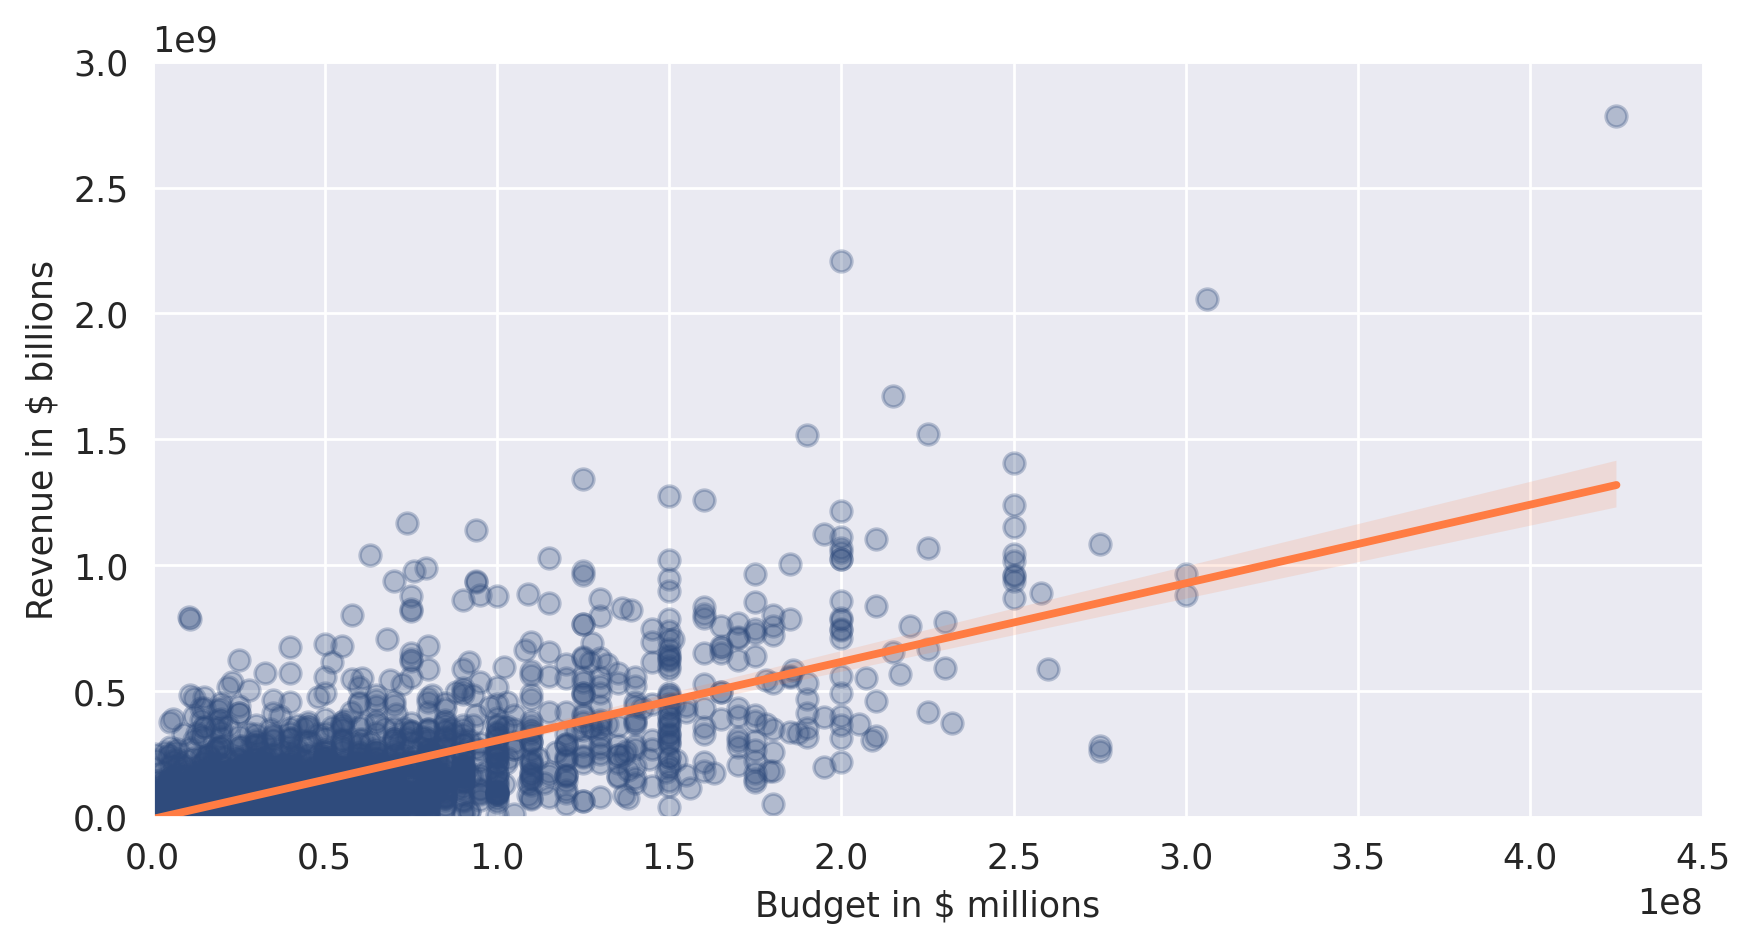

In [117]:
plt.figure(figsize=(8,4), dpi=250)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films,
                    x="USD_Production_Budget",
                    y="USD_Worldwide_Gross",
                    color="#2f4b7c",
                    scatter_kws={"alpha": 0.3},
                    line_kws={"color": "#ff7c43"})
    ax.set(xlabel="Budget in $ millions",
           ylabel="Revenue in $ billions",
           xlim=(0, 450000000),
           ylim=(0, 3000000000))

new_films의 데이터는 old_films 에 비해 선형회귀에 잘 부합한다.

회귀선상에 따르면 1억 5천만 달러의 예산이 있는 영화의 경우 약 5억 달러 정도의 수익을 얻을 수 있을것으로 보인다.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [123]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
Y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])
regression.fit(X,Y)

LinearRegression()

In [124]:
# y 절편
regression.intercept_

array([-8653311.20858923])

In [125]:
# 기울기
regression.coef_

array([[3.12262611]])

In [126]:
# R-squared
regression.score(X,Y)

0.5576797626619335

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [127]:
regression_old = LinearRegression()

In [132]:
X = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
Y = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
regression_old.fit(X, Y)
print(f"intercept: {regression_old.intercept_}")
print(f"coef: {regression_old.coef_}")
print(f"R-squared: {regression_old.score(X, Y)}")

intercept: [4069028.90544234]
coef: [[0.01782627]]
R-squared: 0.02937258620576888


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [133]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
Y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])
regression.fit(X,Y)

LinearRegression()

In [140]:
round(350000000 * regression.coef_[0, 0] + regression.intercept_[0], -5)

1084300000.0